# Simple Binary Classification on Adult Dataset

In this notebook, we explore the Adult dataset and train a simple binary classifier.

I am adding some content here!

In [ ]:
import numpy as np
import time

def log_loss(y, p):
    """
    Compute the log loss of scalar predicted proba p and true class label y.
    """
    OFFSET = 1e-10
    return -(y * np.log(p + OFFSET) + (1 - y) * np.log(1 - p + OFFSET))

time.sleep(5)

print(log_loss(1, 0.99))
print(log_loss(1, 0.5))
print(log_loss(1, 0.01))
print(log_loss(0, 0.01))

$\alpha$

$\beta$

$\gamma_{123}^{227}$

In [316]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

df
dfdf
dfdfdfd

## 1. Exploratory Data Analyais

### 1.1. Loading the Dataset

In [317]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    sep=', ',
    engine='python',
    header=None
)

column_names = [
    'Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
    'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender',
    'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income'
]
df.columns = [n.lower() for n in column_names]

df.shape

(32561, 15)

In [318]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Transform the target variable `Income` as a binary variable.

In [319]:
df['target'] = [0 if l else 1 for l in (df['income'] == '<=50K')]
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


### 1.2. Data Engineering

In this section, we visualize the distribution of each feature one by one. Then we remove or transform some features before training the binary classifier.

In [320]:
def overlay_hist(df, c):
    """
    Plot two histogram of two values overlaying each other.
    """
    
    num_unique = len(df[c].unique())
    
    if df[c].dtype == 'object':
        counter_1 = Counter(df[c][df['target'] == 1])
        counter_2 = Counter(df[c][df['target'] != 1])

        bar_names = []
        bar_densities_1 = []
        bar_densities_2 = []

        for f in counter_1:
            bar_names.append(f)
            bar_densities_1.append(counter_1[f] / df.shape[0])
            bar_densities_2.append(counter_2[f] / df.shape[0])

        for f in counter_2:
            if f not in counter_1:
                bar_names.append(f)
                bar_densities_1.append(counter_1[f] / df.shape[0])
                bar_densities_2.append(counter_2[f] / df.shape[0])

        count_df = pd.DataFrame(np.c_[bar_densities_2, bar_densities_1], index=bar_names)
        ax = count_df.plot.bar(alpha=0.5)
        ax.set_title(c)
        ax.figure.autofmt_xdate(rotation=45)

    else:
        plt.hist(df[c][df['target'] == 1], alpha=0.5, density=True, label='>50k', bins=50)
        plt.hist(df[c][df['target'] != 1], alpha=0.5, density=True, label='<=50k', bins=50)
        plt.title(c)
        
    plt.legend(loc='upper right')
    print('Num of unique values: ', num_unique)
    plt.show()

In [321]:
new_df = df.copy()

Num of unique values:  73


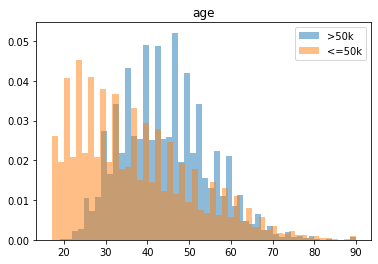

In [322]:
overlay_hist(df, 'age')

The distribution difference between these two groups on age is quite significant.

Num of unique values:  9


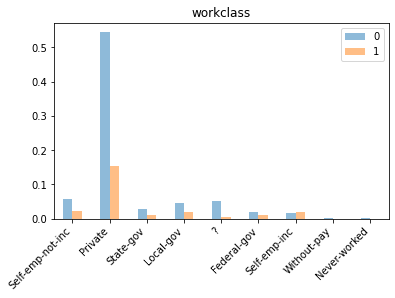

In [323]:
overlay_hist(df, 'workclass')

Num of unique values:  21648


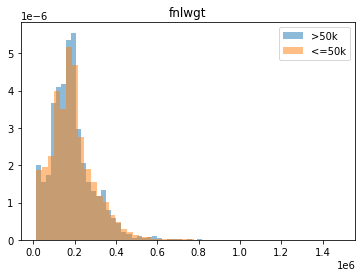

In [324]:
overlay_hist(df, 'fnlwgt')

`fnlwgt` stands for "Final Weight", which is used to give weight to different sample so that people with similar demographic characteristics have the same weight. This feature is not really useful in this model.

In [325]:
del new_df['fnlwgt']

Num of unique values:  16


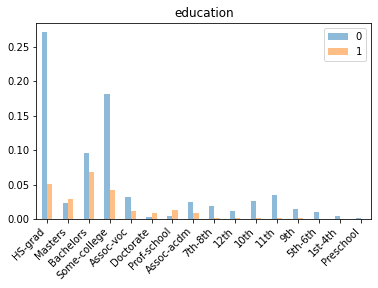

In [326]:
overlay_hist(df, 'education')

Num of unique values:  16


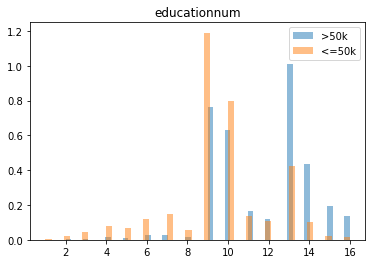

In [327]:
overlay_hist(df, 'educationnum')

Num of unique values:  7


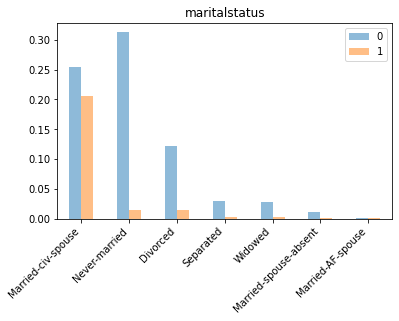

In [328]:
overlay_hist(df, 'maritalstatus')

Num of unique values:  15


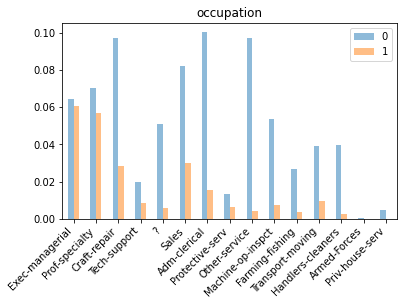

In [329]:
overlay_hist(df, 'occupation')

Num of unique values:  6


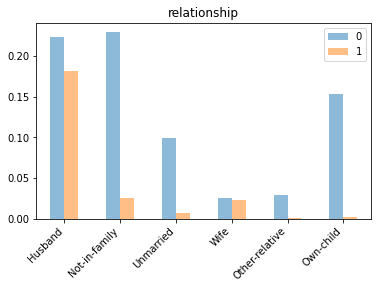

In [330]:
overlay_hist(df, 'relationship')

Num of unique values:  5


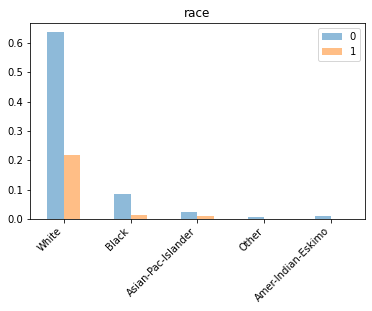

In [331]:
overlay_hist(df, 'race')

Num of unique values:  2


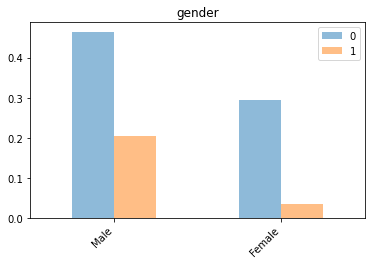

In [332]:
overlay_hist(df, 'gender')

Num of unique values:  119


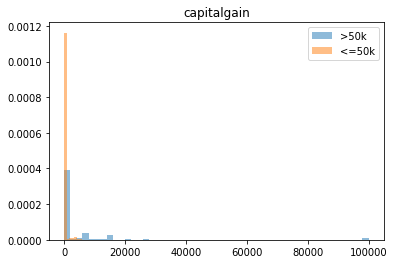

In [333]:
overlay_hist(df, 'capitalgain')

Num of unique values:  92


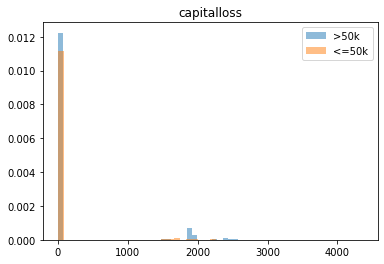

In [334]:
overlay_hist(df, 'capitalloss')

These two features `capitalgain` and `capitalloss` have many 0 values. It makes sense, because the census define capital gain/loss as the profit/loss of asset sales (stocks or real estate). Not all people would yield cpaital gain/loss in a particular. We can convert these two variables as binary features `has_capitalgain` and `has_capitalloss`.

In [335]:
new_df['has_capitalgain'] = [int(t) for t in df['capitalgain'] != 0]
new_df['has_capitalloss'] = [int(t) for t in df['capitalloss'] != 0]

del new_df['capitalgain']
del new_df['capitalloss']

Num of unique values:  94


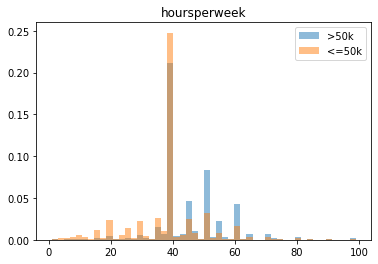

In [336]:
overlay_hist(df, 'hoursperweek')

Working 40 hours a week is typical in the dataset. Interestingly people who earn more tend to work longer.

Num of unique values:  42


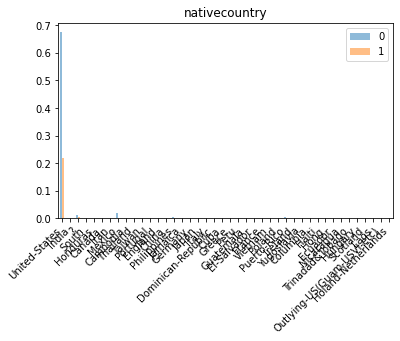

In [337]:
overlay_hist(df, 'nativecountry')

The majority of the native country is the US. We can encode it as another binary variable `from-usa` to decrease the number of levels.

In [338]:
new_df['from_usa'] = [int(t) for t in df['nativecountry'] == 'United-States']
del new_df['nativecountry']

Num of unique values:  2


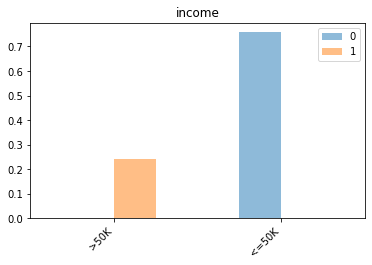

In [339]:
overlay_hist(df, 'income')

It shows this dataset is quite imbalanced.

In [340]:
new_df.head()

,age,workclass,education,educationnum,maritalstatus,occupation,relationship,race,gender,hoursperweek,income,target,has_capitalgain,has_capitalloss,from_usa
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K,0,1,0,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K,0,0,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K,0,0,0,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K,0,0,0,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K,0,0,0,0
